In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 920 kB 6.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


               Tambak  Produksi Udang/Ton  Luas Tambak/m2   PH  Banyak Bibit  \
0  Tambak Peneng Jaya                35.0         13200.0  7.8     1470000.0   
1         Tambak Raki                12.0          4800.0  7.4      480000.0   
2     Tambak Sudirman                19.0          4800.0  7.0      680000.0   
3        Tambak Teuku                 1.0          1000.0  7.2       50000.0   
4      Tambak Marhadi                33.0         14464.0  7.2     1850000.0   

   Jenis Pakan  Jumlah Pakan/Ton      Cluster  
0          1.0              35.0         Baik  
1          3.0              12.8   Tidak Baik  
2          2.0               8.3   Tidak Baik  
3          1.0               1.2  Sangat Baik  
4          1.0              12.0         Baik  

Number of iterations until convergence: 12

Cluster Counts:
Tidak Baik     2
Baik           2
Sangat Baik    1
Name: Cluster, dtype: int64


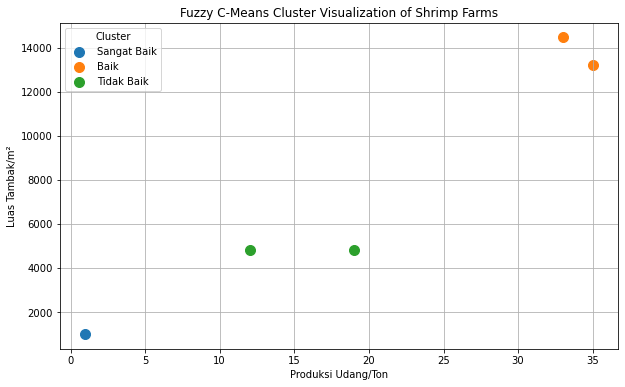


Centroid coordinates for each cluster:
           Produksi Udang/Ton  Luas Tambak/m2        PH  Banyak Bibit  \
Cluster 1            1.057691     1019.121269  7.200723  5.230366e+04   
Cluster 2           33.963279    13853.704326  7.489354  1.666648e+06   
Cluster 3           15.644602     4812.055151  7.193976  5.846974e+05   

           Jenis Pakan  Jumlah Pakan/Ton  
Cluster 1     1.006777          1.251958  
Cluster 2     1.000104         23.091871  
Cluster 3     2.481078         10.503316  

Menentukan Cluster Berdasarkan Derajat Keanggotaan:
               Tambak  Produksi Udang/Ton  Luas Tambak/m2   PH  Banyak Bibit  \
0  Tambak Peneng Jaya                35.0         13200.0  7.8     1470000.0   
1         Tambak Raki                12.0          4800.0  7.4      480000.0   
2     Tambak Sudirman                19.0          4800.0  7.0      680000.0   
3        Tambak Teuku                 1.0          1000.0  7.2       50000.0   
4      Tambak Marhadi                33.0 

In [14]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy.cluster import cmeans
import matplotlib.pyplot as plt

# Define the data for clustering
data = np.array([
    [35, 13200, 7.8, 1470000, 1, 35],   # Tambak Peneng Jaya
    [12, 4800, 7.4, 480000, 3, 12.8],   # Tambak Raki
    [19, 4800, 7.0, 680000, 2, 8.3],    # Tambak Sudirman
    [1, 1000, 7.2, 50000, 1, 1.2],      # Tambak Teuku
    [33, 14464, 7.2, 1850000, 1, 12]    # Tambak Marhadi
])

# Fuzzy C-Means parameters
n_clusters = 3
m = 2.0
error = 0.0001
max_iter = 100

# Apply Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = cmeans(data.T, n_clusters, m, error, max_iter)

# Assign cluster labels based on highest membership values
cluster_labels = np.argmax(u, axis=0)

# Define DataFrame for results
tambak_names = ["Tambak Peneng Jaya", "Tambak Raki", "Tambak Sudirman", "Tambak Teuku", "Tambak Marhadi"]
cluster_names = {0: "Sangat Baik", 1: "Baik", 2: "Tidak Baik"}
results_df = pd.DataFrame({
    "Tambak": tambak_names,
    "Produksi Udang/Ton": data[:, 0],
    "Luas Tambak/m2": data[:, 1],
    "PH": data[:, 2],
    "Banyak Bibit": data[:, 3],
    "Jenis Pakan": data[:, 4],
    "Jumlah Pakan/Ton": data[:, 5],
    "Cluster": [cluster_names[label] for label in cluster_labels]
})

# Display results
print(results_df)
print(f"\nNumber of iterations until convergence: {len(jm)}")
print("\nCluster Counts:")
print(results_df['Cluster'].value_counts())

# Plot the clustering results
plt.figure(figsize=(10, 6))
for i, cluster_name in enumerate(cluster_names.values()):
    cluster_data = results_df[results_df['Cluster'] == cluster_name]
    plt.scatter(cluster_data['Produksi Udang/Ton'], cluster_data['Luas Tambak/m2'], label=cluster_name, s=100)

# Labeling the plot
plt.title("Fuzzy C-Means Cluster Visualization of Shrimp Farms")
plt.xlabel("Produksi Udang/Ton")
plt.ylabel("Luas Tambak/m²")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

centroid_df = pd.DataFrame(
    cntr, 
    columns=["Produksi Udang/Ton", "Luas Tambak/m2", "PH", "Banyak Bibit", "Jenis Pakan", "Jumlah Pakan/Ton"],
    index=["Cluster 1", "Cluster 2", "Cluster 3"]
)

print("\nCentroid coordinates for each cluster:")
print(centroid_df)

# Create a DataFrame for membership degrees
membership_df = pd.DataFrame(u.T, columns=["Cluster 1", "Cluster 2", "Cluster 3"])
membership_df["Cluster"] = [f"Cluster {label + 1}" for label in cluster_labels]

# Combine the membership degrees with original results
combined_df = pd.concat([results_df, membership_df], axis=1)

# Display the combined DataFrame
print("\nMenentukan Cluster Berdasarkan Derajat Keanggotaan:")
print(combined_df)